In [1]:
import pandas as pd

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

dfP= pd.read_csv('SchizophreniaSymptomnsData.csv')

# Exploratory Data Analysis (EDA)
print("Dataset Info:")
print(dfP.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            5000 non-null   object 
 1   Age             5000 non-null   int64  
 2   Gender          5000 non-null   object 
 3   Marital_Status  5000 non-null   object 
 4   Fatigue         4756 non-null   float64
 5   Slowing         4771 non-null   float64
 6   Pain            4758 non-null   float64
 7   Hygiene         5000 non-null   float64
 8   Movement        5000 non-null   float64
 9   Schizophrenia   5000 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 390.8+ KB
None


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
print("\nSummary Statistics:")
print(dfP.describe())


Summary Statistics:
              Age      Fatigue      Slowing         Pain      Hygiene  \
count  5000.00000  4756.000000  4771.000000  4758.000000  5000.000000   
mean     74.83340     0.503835     0.499524     0.499612     0.499717   
std       9.57787     0.296123     0.295365     0.294886     0.294907   
min      55.00000    -0.095115    -0.094843    -0.095771    -0.094284   
25%      67.00000     0.247056     0.245795     0.251174     0.248998   
50%      75.00000     0.506278     0.502403     0.498051     0.501223   
75%      83.00000     0.759499     0.744812     0.749946     0.751029   
max      95.00000     1.091136     1.092146     1.090027     1.086922   

          Movement  
count  5000.000000  
mean      0.499952  
std       0.289860  
min      -0.089272  
25%       0.254143  
50%       0.503340  
75%       0.741253  
max       1.088914  


In [3]:
dfP.head()

,Name,Age,Gender,Marital_Status,Fatigue,Slowing,Pain,Hygiene,Movement,Schizophrenia
0,Leslie Goodwin,68,Female,Single,0.698075,0.123064,0.375303,0.234639,0.251869,Elevated Proneness
1,Dr. Troy Castaneda,88,Male,Married,0.049245,-0.042080,0.432807,0.501238,0.379948,Moderate Proneness
2,Chelsey Allen,67,Female,Married,0.651995,0.187117,NaN,0.301942,0.302588,Elevated Proneness
3,Dr. Devin Skinner DVM,95,Female,Widowed,0.036324,0.580808,0.005356,0.306968,0.813618,Moderate Proneness
4,Megan Mendez,81,Female,Widowed,0.926727,0.484202,0.702405,0.736054,0.579448,High Proneness


In [4]:
dfP.tail()

,Name,Age,Gender,Marital_Status,Fatigue,Slowing,Pain,Hygiene,Movement,Schizophrenia
4995,Anna Blevins,61,Female,Single,0.933016,0.505532,1.010435,0.868590,0.552105,High Proneness
4996,Robert Frazier,60,Female,Single,0.260125,0.625811,-0.076161,0.079046,0.593206,Moderate Proneness
4997,Louis Flores,62,Male,Married,0.248583,NaN,0.596990,0.119659,0.782998,Moderate Proneness
4998,Julie Nguyen,76,Female,Widowed,0.265702,0.525682,0.546284,0.402468,0.222236,Moderate Proneness
4999,Krista Cunningham,59,Male,Married,0.489590,0.630955,0.128390,0.552271,0.580275,Elevated Proneness


In [5]:
dfP.shape

(5000, 10)

In [6]:
dfP.duplicated().sum()

0

In [7]:
dfP['Schizophrenia'].unique()

array(['Elevated Proneness', 'Moderate Proneness', 'High Proneness',
       'Low Proneness', 'Very High Proneness'], dtype=object)

In [8]:
dfP['Schizophrenia'].value_counts()

Schizophrenia
Elevated Proneness     3077
High Proneness          953
Moderate Proneness      912
Low Proneness            45
Very High Proneness      13
Name: count, dtype: int64

In [9]:
# Apply LabelEncoder to the 'Proneness_Class' column
le = LabelEncoder()
dfP['Schizophrenia'] = le.fit_transform(dfP['Schizophrenia'])

# Handling Missing Values
imputer = SimpleImputer(strategy='mean')
numeric_cols = ['Fatigue', 'Slowing', 'Pain', 'Hygiene', 'Movement', 'Schizophrenia']
dfP[numeric_cols] = imputer.fit_transform(dfP[numeric_cols])

# List of categorical columns to drop
categorical_cols = ['Name', 'Gender','Age', 'Marital_Status']

# Drop the categorical columns
dfP = dfP.drop(categorical_cols, axis=1)

# Define the columns to scale
standard_cols = ['Fatigue', 'Slowing', 'Pain', 'Hygiene', 'Movement']

# Scale features using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))  # This ensures values are within the 0 to 1 range
dfP[standard_cols] = scaler.fit_transform(dfP[standard_cols])

# Save preprocessed data
preprocessed_file = 'preprocessed.csv'
dfP.to_csv(preprocessed_file, index=False)

print(f"Saved preprocessed data to {preprocessed_file} using oneAPI libraries")

Saved preprocessed data to preprocessed.csv using oneAPI libraries


In [10]:
dfP

,Fatigue,Slowing,Pain,Hygiene,Movement,Schizophrenia
0,0.668653,0.183580,0.397263,0.278464,0.289548,0.0
1,0.121694,0.044451,0.445757,0.504164,0.398257,3.0
2,0.629807,0.237542,0.502095,0.335441,0.332596,0.0
3,0.110802,0.569214,0.085281,0.339696,0.766339,3.0
4,0.861405,0.487827,0.673113,0.702957,0.567585,1.0
...,...,...,...,...,...,...
4995,0.866706,0.505797,0.932879,0.815161,0.544377,1.0
4996,0.299465,0.607127,0.016537,0.146740,0.579262,3.0
4997,0.289735,0.500735,0.584215,0.181122,0.740350,3.0
4998,0.304166,0.522772,0.541454,0.420546,0.264397,3.0


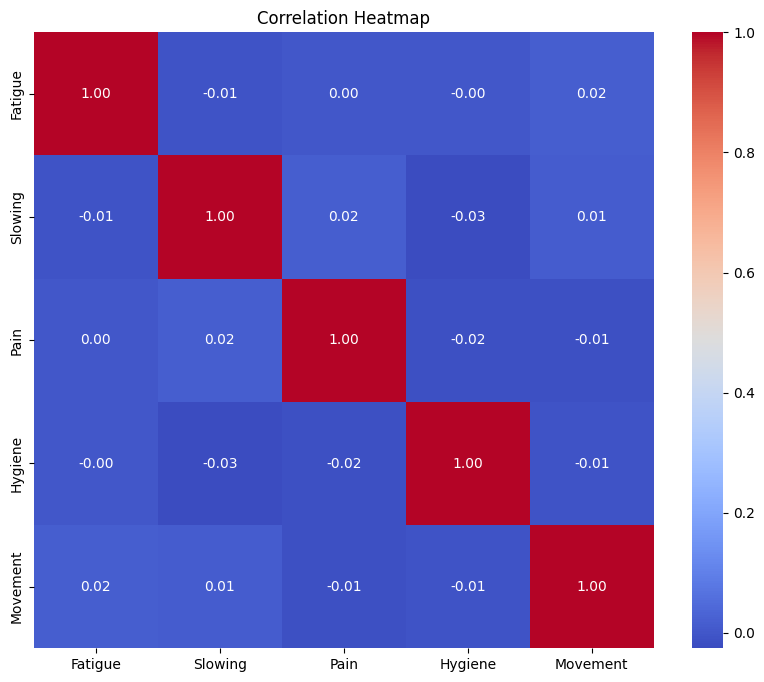

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('preprocessed.csv')

df1 = df.drop(['Schizophrenia'], axis =1)

# Compute correlation matrix
correlation_matrix = df1.corr()

plt.figure(figsize=(10,8))
ax = sns.heatmap(correlation_matrix, 
                 annot=True, 
                 cmap='coolwarm',
                 fmt='.2f')

ax.set_title('Correlation Heatmap')
plt.show()

In [12]:
import pandas as pd
import pickle

from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset with the encoded class
dataset_with_encoded_proneness_class_filename = 'preprocessed.csv'
df = pd.read_csv(dataset_with_encoded_proneness_class_filename)

# Select features (symptoms) and target (encoded proneness class)
X = df[['Fatigue', 'Slowing', 'Pain', 'Hygiene', 'Movement']]
y = df['Schizophrenia']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers with distinct names
classifiers = [
    ('DecisionTree', DecisionTreeClassifier(random_state=42)),
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('SVC', SVC(random_state=42)),
    ('KNeighbors', KNeighborsClassifier()),
    ('LogisticRegression', LogisticRegression(random_state=42))
]

# Train and evaluate each classifier
for name, classifier in classifiers:
    print(f"Training {name}...")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

    # Save the trained model as a pickle file
    model_filename = f"{name}_model.pkl"
    with open(model_filename, 'wb') as file:
        pickle.dump(classifier, file)
    print(f"Saved {name} model as {model_filename}")

    # Print predicted labels alongside true labels
    predictions = pd.DataFrame({'True_Labels': y_test, 'Predicted_Labels': y_pred})
    print(f"Predictions using {name} model:")
    print(predictions)
    print()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Training DecisionTree...
DecisionTree Accuracy: 0.8070
Saved DecisionTree model as DecisionTree_model.pkl
Predictions using DecisionTree model:
      True_Labels  Predicted_Labels
1501          1.0               4.0
2586          1.0               4.0
2653          0.0               0.0
1055          0.0               0.0
705           0.0               0.0
...           ...               ...
4711          0.0               0.0
2313          0.0               0.0
3214          0.0               0.0
2732          3.0               3.0
1926          3.0               3.0

[1000 rows x 2 columns]

Training RandomForest...
RandomForest Accuracy: 0.9070
Saved RandomForest model as RandomForest_model.pkl
Predictions using RandomForest model:
      True_Labels  Predicted_Labels
1501          1.0               1.0
2586          1.0               1.0
2653          0.0               0.0
1055          0.0               0.0
705           0.0               0.0
...           ...               ...
47

In [13]:
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset with the encoded class
dataset_with_encoded_proneness_class_filename = 'preprocessed.csv'
df = pd.read_csv(dataset_with_encoded_proneness_class_filename)

# Select features (symptoms) and target (encoded proneness class)
X = df[['Fatigue', 'Slowing', 'Pain', 'Hygiene', 'Movement']]
y = df['Schizophrenia']

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = [
    MultinomialNB(),
    GaussianNB()
]

# Train and evaluate each classifier
for classifier in classifiers:
    classifier_name = classifier.__class__.__name__
    print(f"Training {classifier_name}...")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{classifier_name} Accuracy: {accuracy:.4f}")

Training MultinomialNB...
MultinomialNB Accuracy: 0.6240
Training GaussianNB...
GaussianNB Accuracy: 0.8010


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [14]:
import pickle
import numpy as np

# Load the trained SVC model from the pickle file
with open('SVC_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Feature names in the same order as used during training
feature_names = ['Fatigue', 'Slowing', 'Pain', 'Hygiene', 'Movement']

# Sample input data as a numpy array
sample_input = np.array([0.8614045259198462,0.48782712283165863,0.6731127908512476,0.7029573635781353,0.5675849668890276], dtype=float)

# Reshape the input to match the expected shape for prediction
sample_input = sample_input.reshape(1, -1)

# Predict proneness
predicted_proneness = model.predict(sample_input)

# Print the predicted proneness
print("Predicted Proneness:", predicted_proneness)

Predicted Proneness: [1.]
